In [33]:
import pandas as pd

# 데이터 수집
df = pd.read_csv("../machine learning study/data/csv/basketball_stat.csv")
#수집된 데이터 샘플을 확인
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [34]:
# 현재 데이터에서 포지션의 개수
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

Text(0.5,1,'STL and 2P in 2d plane')

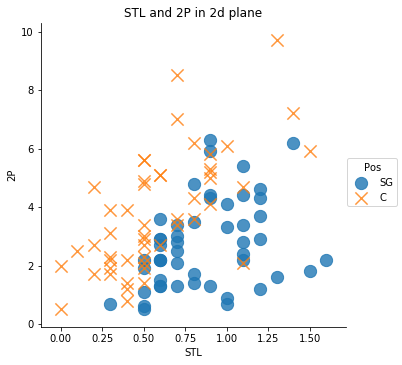

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#씨본을 사용해 2차원 그래프를 생성
#스틸, 2점슛 데이터 시각화
sns.lmplot('STL','2P', data=df, fit_reg=False, #x축 y 축, 데이터, 예측선
          scatter_kws={"s":150}, # 좌표 상의 점의 크기
          markers=["o","x"], #마커 모양 (d,v,h)
          hue="Pos")# 예측값
#타이틀
plt.title('STL and 2P in 2d plane')

#----------------------------------------------------------------------------------


Text(0.5,1,'AST and 2P in 2d plane')

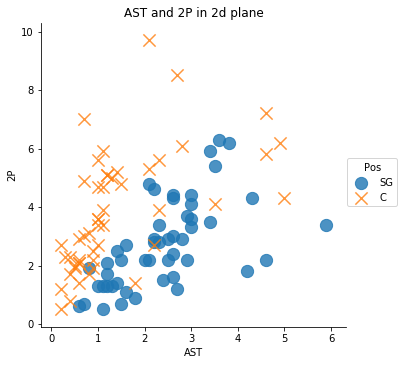

In [36]:
sns.lmplot('AST','2P', data=df, fit_reg=False,
          markers=["o","x"],
          scatter_kws={"s":150},
          hue="Pos")
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

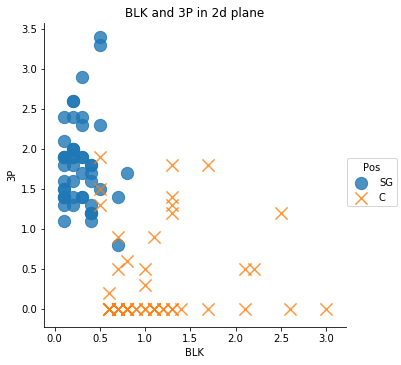

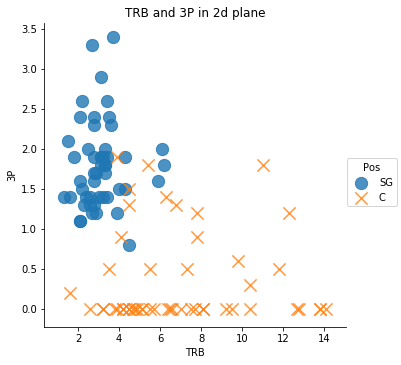

In [9]:
#블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK','3P', data=df, fit_reg=False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue="Pos")
plt.title('BLK and 3P in 2d plane')

#리바운드와 3점슛 그래프
sns.lmplot('TRB','3P', data=df, fit_reg=False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue="Pos")
plt.title ("TRB and 3P in 2d plane")

Text(0.5,1,'2P and BLK in 2d plane')

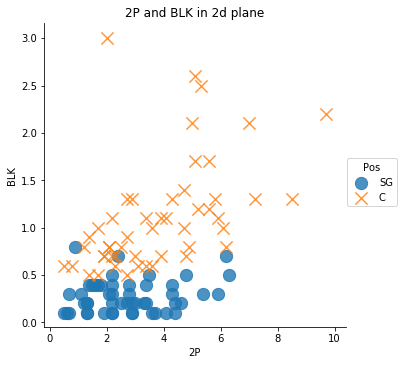

In [37]:
## x축과 y축 의 연관성 즉 x축이 어시스트, y축이 3점슛이었다면? 그래도 비슷한 그림을 보일것인가?
#어시스트와 3점슛 그래프
sns.lmplot('2P','BLK', data=df, fit_reg=False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue="Pos")
plt.title ("2P and BLK in 2d plane")

In [38]:

#분별력이 없는 특징(feature)을 데이터에서 제거한다
df.drop(['2P','AST','STL'], axis=1, inplace=True)
#---------------------------------------------------------------
#없어졌는지 확인
df.head()

#------------------------------------------------------------------


,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [51]:
# 사이킷 런의 train_test_split 을 사용하여 제이터를 나눈다.
from sklearn.model_selection import train_test_split

#다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

#학습데이터와 테스트 데이터의 개수를 확인
train.shape[0]

#------------------------------------------------------------------

80

In [52]:
test.shape[0]

20

In [53]:
# knn 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#------------------------------------------------------------
#최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
# 3 < k < 학습데이터 절반까지(k 와 이웃한 데이터 수
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range,2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차검증(10-fold)을 각 k 를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),cv=10,
                             scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores


[0.9180555555555555,
 0.9291666666666666,
 0.9291666666666666,
 0.9291666666666666,
 0.9148809523809524,
 0.9148809523809524,
 0.9148809523809524,
 0.9148809523809524,
 0.9273809523809524,
 0.9148809523809524,
 0.9273809523809524,
 0.900595238095238,
 0.8769841269841269,
 0.8769841269841269,
 0.8769841269841269,
 0.850595238095238,
 0.8363095238095237,
 0.8251984126984127,
 0.8015873015873016]

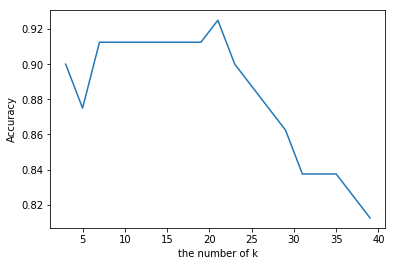

In [50]:
#k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [43]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print ("The best number of k :"+ str(k))

The best number of k :8


In [18]:

from sklearn.metrics import accuracy_score
optimal_k = k

knn = KNeighborsClassifier(n_neighbors=optimal_k)

#학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
#선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

#kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

#테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

#선수 포지션에 대한 정답을 지정
y_test= test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도(accuracy) 출력
print("accuracy : "  + str( accuracy_score(y_test.values.ravel(), pred)) )


accuracy : 0.9


In [19]:
#실제값과 예측된 값을 비교
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,SG,SG
7,C,C
8,C,C
9,SG,SG
